# TASK 3 ----- HEART DISEASE PREDICTION

# Importing Libraries

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
#Loading Dataset
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Check the missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#check the summary stastistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

# Gender Distribution of Patients

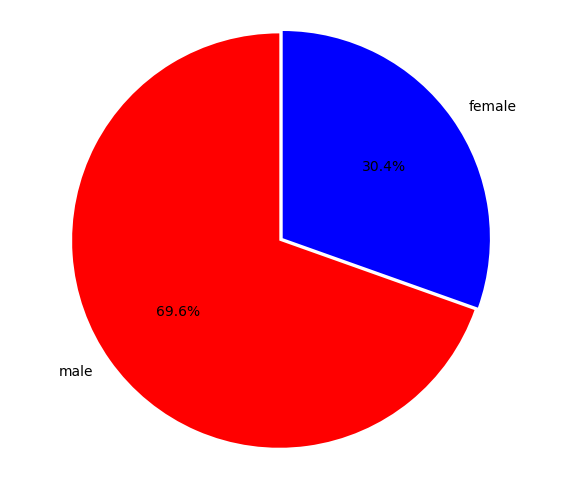

In [10]:
male=len(df[df["sex"]==1])
female=len(df[df["sex"]==0])
lables="male","female"
sizes=[male,female]
colors=["red","blue"]
explode=(0,0.02)
plt.figure(figsize=(7,6))
plt.pie(sizes,labels=lables,colors=colors,explode=explode,autopct='%1.1f%%',startangle=90)
plt.axis("equal")
plt.show()

In [11]:
df["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

# Chest Pain Types

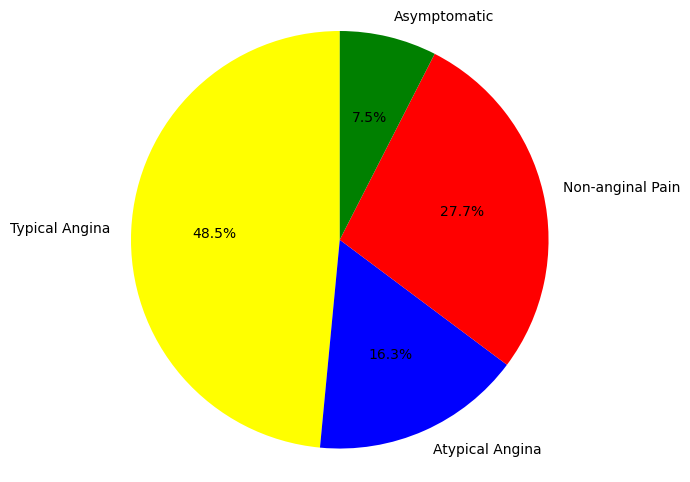

In [12]:
typical=len(df[df["cp"]==0])
atypical=len(df[df["cp"]==1])
non=len(df[df["cp"]==2])
asymtomatic=len(df[df["cp"]==3])
lables="Typical Angina","Atypical Angina", "Non-anginal Pain", "Asymptomatic"
sizes=[typical,atypical,non,asymtomatic]
colors=["yellow","blue","red","green"]
explode=(0,0,0,0)
plt.figure(figsize=(7,6))
plt.pie(sizes,labels=lables,colors=colors,explode=explode,autopct='%1.1f%%',startangle=90)
plt.axis("equal")
plt.show()

In [13]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

# Patients Diagnosed with Heart Disease

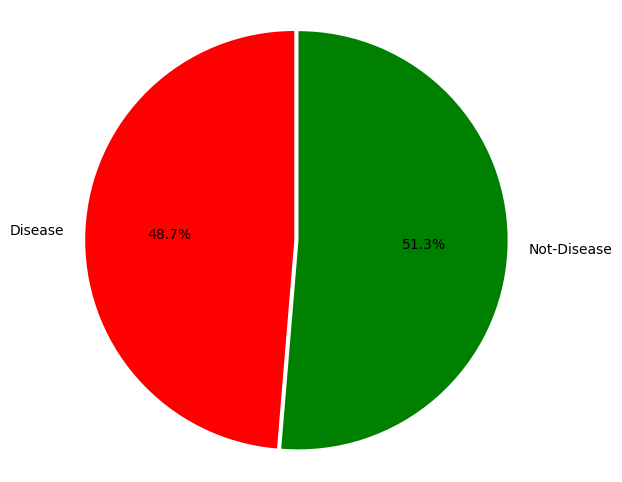

In [14]:
disease=len(df[df["target"]==0])
nodisease=len(df[df["target"]==1])
lables="Disease","Not-Disease"
sizes=[disease,nodisease]
colors=["red","green"]
explode=(0,0.02)
plt.figure(figsize=(7,6))
plt.pie(sizes,labels=lables,colors=colors,explode=explode,autopct="%1.1f%%",startangle=90)
plt.axis("equal")
plt.show()

# Separate data into dependent and target variable

In [15]:
X=df.iloc[:,:-1]
X[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [16]:
Y=df.iloc[:,-1]
Y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Splitting Dataset

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Model Creation

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(X_train,Y_train)
Y_pred1=lg.predict(X_test)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred1))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred1))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred1))

confusion_matrix :  [[126  27]
 [ 14 141]]
score :  0.8668831168831169
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       153
           1       0.84      0.91      0.87       155

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_pred2=dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred2))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred2))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred2))

confusion_matrix :  [[149   4]
 [  4 151]]
score :  0.974025974025974
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       155

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



# K Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred3=knn.predict(X_test)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred3))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred3))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred3))

confusion_matrix :  [[109  44]
 [ 39 116]]
score :  0.7305194805194806
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.72      0.75      0.74       155

    accuracy                           0.73       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.73      0.73      0.73       308



# Support Vector Machine

In [21]:
from sklearn.svm import SVC

sv=SVC()
sv.fit(X_train,Y_train)
Y_pred4=knn.predict(X_test)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred4))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred4))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred4))

confusion_matrix :  [[109  44]
 [ 39 116]]
score :  0.7305194805194806
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.72      0.75      0.74       155

    accuracy                           0.73       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.73      0.73      0.73       308



# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rr=RandomForestClassifier(n_estimators=200)
rr.fit(X_train,Y_train)
Y_pred5=rr.predict(X_test)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred5))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred5))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred5))

confusion_matrix :  [[149   4]
 [  8 147]]
score :  0.961038961038961
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.97      0.95      0.96       155

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



# K-Fold Cross Validation Accuracy Score Visualization

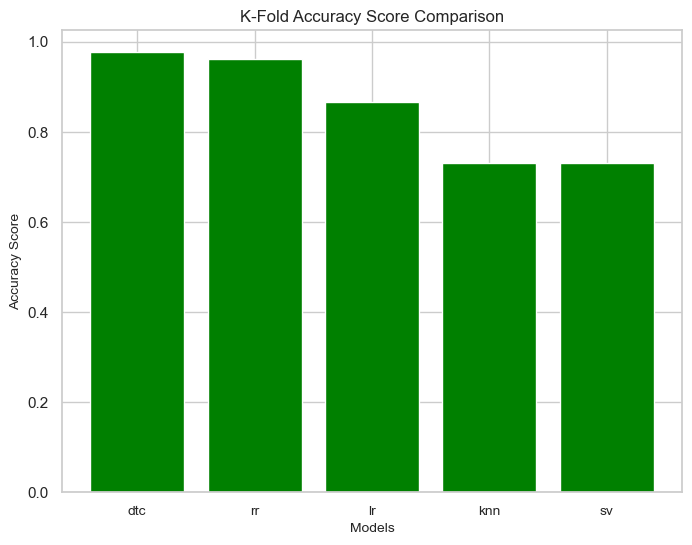

In [23]:
kfold_labels = ['dtc','rr','lr','knn','sv']
kfold_results = [0.977,0.961,0.866,0.730,0.730]

index = np.arange(len(kfold_labels))

plt.figure(figsize=(8,6)) # Size of the figure
sns.set(style="whitegrid") # Background grid


plt.bar(index, kfold_results, color='green')
plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=10)
plt.xticks(index, kfold_labels, fontsize=10)
plt.title('K-Fold Accuracy Score Comparison')
plt.show()

The Conclusion from Model Building Therefore Decision Tree is the best model for this prediction since it has an accuracy_score of 0.977

<AxesSubplot:>

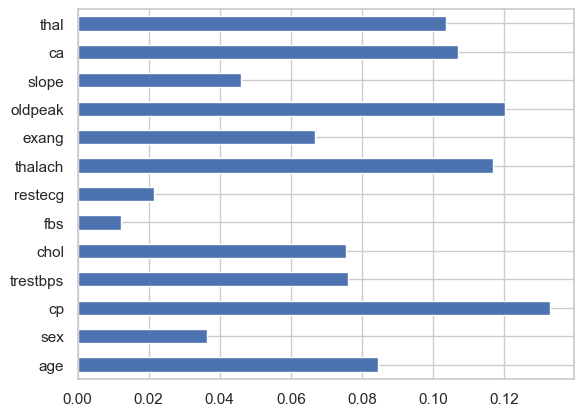

In [24]:
#Plotting feature importances
(pd.Series(rr.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that cp as a feature is the most important in this dataset.

# Predict Heart Disease

In [25]:
x=np.array(X.loc[[546]])
x

array([[ 70. ,   1. ,   0. , 130. , 322. ,   0. ,   0. , 109. ,   0. ,
          2.4,   1. ,   3. ,   2. ]])

In [26]:
pred=dtc.predict(x)
if pred[0]==0:
    print("Patient has Heart Disease")
else:
    print("Patient has not Heart Disease")

Patient has Heart Disease


In [27]:
Y_test[546]

0

In [28]:
x=np.array(X.loc[[181]])
x

array([[ 64. ,   1. ,   3. , 110. , 211. ,   0. ,   0. , 144. ,   1. ,
          1.8,   1. ,   0. ,   2. ]])

In [29]:
pred=dtc.predict(x)
if pred[0]==0:
    print("Patient has Heart Disease")
else:
    print("Patient has not Heart Disease")

Patient has not Heart Disease


In [30]:
Y_test[181]

1

# Thank You !!